In [ ]:
%cd
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/Colab Notebooks/WSSS
%ls

/root
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/WSSS
AdelaiDet/                   PuzzleCAM/
ADL_notok.ipynb              res38_cls.pth
AuxSegNet/                   SEAM/
BANA/                        SESS/
BBAM/                        src/
BBAM_notok.ipynb             test_img2.jpg
BESTIE/                      test_img.jpg
BoxInst_notok.ipynb          TokenCut/
CCAM/                        TokenCut_ok.ipynb
CCAM_ok.ipynb                transcam/
COCO2YOLO/                   transcam_6485.pth
Conformer_small_patch16.pth  transcam_deeplab.ipynb
data_voc/                    transcam_instance_ok.ipynb
DiscoBox/                    transcam_instance_v2_ok.ipynb
DiscoBox_notok.ipynb         transcam_instance_v3_ok.ipynb
externals/                   transcam_masks_ok.ipynb
global-wheat-detection.zip   transcam_ok.ipynb
instances_val2017.json       transcam_train.ipynb

In [ ]:
# Root directory
voc12_root = '../wheat/images/train/'

# image for test
img_name_1 = '890182186'
img_label_1 = 1

In [ ]:
""" Install and check MIDAS inference """ 
!pip install timm

import cv2
import torch
import urllib.request
import numpy as np
import matplotlib.pyplot as plt

# model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)
!pip install einops
import einops
midas = torch.hub.load("isl-org/MiDaS", model_type)

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

filename = 'wheat/images/train/'+img_name_1+'.jpg';
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

img = cv2.imread(filename)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

input_batch = transform(img).to(device)




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Using cache found in /root/.cache/torch/hub/isl-org_MiDaS_master


Loading weights:  None


Using cache found in /root/.cache/torch/hub/rwightman_gen-efficientnet-pytorch_master
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [ ]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()


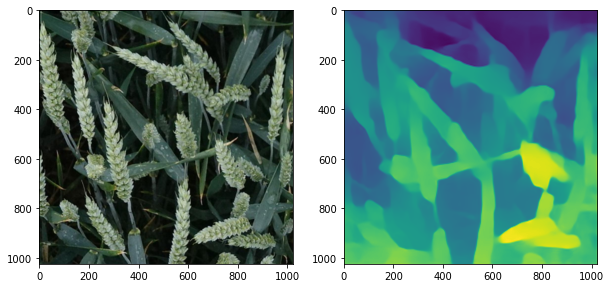

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
plt.imshow(output)

In [ ]:
%cd transcam
!pip install -U matplotlib;
!python3 -m pip install -r requirements.txt;
!pip install matplotlib==3.1.3;

/content/drive/MyDrive/Colab Notebooks/WSSS/transcam
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.6.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (9.4 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/lucasb-eyer/pydensecrf.git to /tmp/pip-req-build-rdiu0bil
  Running command git clone --filter=blob:none --quiet https://github.com/lucasb-eyer/pydensecrf.git /tmp/pip-req-build-rdiu0bil
  Resolved https://github.com/lucasb-eyer/pydensecrf.git to commit 0d53acbcf5123d4c88040fe68fbb9805fc5b2fb9
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached matplotlib-3.5.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.3 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.3
    Uninstalling matplotlib-3.6.3:
      Successfully uninstalled matplotlib-3.6.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached matplotlib-3.1.3-cp38-cp38-manylinux1_x86_64.whl (13.1 MB)
  Atte

In [ ]:
import os
import time
from glob import glob

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

import matplotlib.pyplot as plt
import cv2
import numpy as np
import torchvision
from tqdm import tqdm
from PIL import Image
import tarfile

from tool import imutils
import voc12.data

In [ ]:
!python train_TransCAM.py --weights "../Conformer_small_patch16.pth";

{'batch_size': 8, 'max_epoches': 20, 'network': 'network.conformer_CAM', 'lr': 5e-05, 'num_workers': 0, 'wt_dec': 0.0005, 'train_list': 'voc12/train_aug.txt', 'arch': 'sm', 'val_list': 'voc12/val.txt', 'session_name': 'TransCAM', 'crop_size': 512, 'weights': '../Conformer_small_patch16.pth', 'voc12_root': 'VOCdevkit/VOC2012', 'tblog_dir': './tblog', 'save_dir': './'}
Net_sm(
  (trans_norm): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
  (trans_cls_head): Linear(in_features=384, out_features=21, bias=True)
  (pooling): AdaptiveAvgPool2d(output_size=1)
  (conv_cls_head): Conv2d(1024, 21, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act1): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv_1): ConvBlock(
    (conv1): Conv2d(64, 64, ke

In [ ]:
import importlib
from torchvision import transforms
import torch.nn.functional as F

model = getattr(importlib.import_module('network.conformer_CAM'), 'Net_sm')()
model.load_state_dict(torch.load('TransCAM_mytest_WHEAT_v13.pth')) # Name of the load weigths
model = model.to(device)
model.eval()

transform = transforms.Compose([
    transforms.Resize((512, 512)),
    np.asarray,
    imutils.Normalize(),
    imutils.HWC_to_CHW,
    torch.from_numpy
])



In [ ]:
IMG_FOLDER_NAME = voc12_root;
def get_img_path(img_name):
    return os.path.join(IMG_FOLDER_NAME, img_name + '.jpg')

def visualize_img(name, label):
    img_path = get_img_path(name)
    orig_img = np.asarray(Image.open(img_path))
    orig_img_size = orig_img.shape[:2]
    img = transform(Image.open(img_path))
    _, _, cams = model('transcam', img.unsqueeze(0).to(device))
    cams = F.interpolate(cams, orig_img_size, mode='bilinear', align_corners=False).detach()
    cams = cams.cpu().numpy()[0][1:]
    cams[cams < 0] = 0
    cam_max = np.max(cams, (1, 2), keepdims=True)
    cam_min = np.min(cams, (1, 2), keepdims=True)
    norm_cam = (cams - cam_min) / (cam_max - cam_min + 1e-5)
    cam = norm_cam[label]
    # cam = np.uint8((cam>0.5) * 255)
    # _, pseudo_mask = cv2.threshold(cam,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    visualize(cam>0.5, orig_img)

def visualize(normalized_heatmap, original=None):
    map_img = np.uint8(normalized_heatmap * 255)
    # _, map_img = cv2.threshold(map_img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    heatmap_img = cv2.applyColorMap(map_img, cv2.COLORMAP_JET)
    if original is not None:
        original_img = cv2.cvtColor(original, cv2.COLOR_RGB2BGR)
        img = cv2.addWeighted(heatmap_img, .6, original_img, 0.4, 0)
    else:
        img = heatmap_img
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    super_img = np.hstack((img, original))
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    axes.imshow(super_img)
    plt.show()

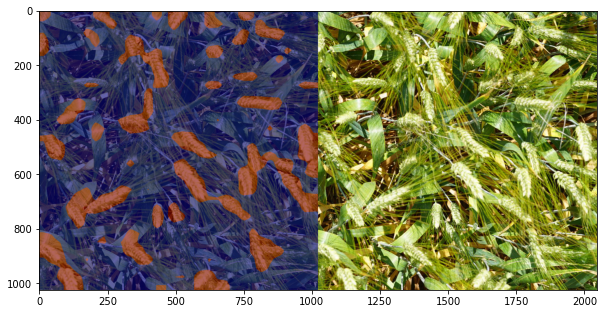

In [ ]:

# img_name_1 = '02d662fa8' #'890182186'#'537395836'# '511091599'
# img_label_1 = 1
img_name_1 = '0e0a0483e'
visualize_img(img_name_1, img_label_1)

In [ ]:
import os
import time
from glob import glob

import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

import matplotlib.pyplot as plt
import cv2
import numpy as np
import torchvision
from tqdm import tqdm
from PIL import Image

import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import csv
import json

In [ ]:
""" Functions to Get instances from semantics """

def get_mask(name, label):
    img_path = get_img_path(name)
    orig_img = np.asarray(Image.open(img_path))
    orig_img_size = orig_img.shape[:2]
    img = transform(Image.open(img_path))
    _, _, cams = model('transcam', img.unsqueeze(0).to(device))
    cams = F.interpolate(cams, orig_img_size, mode='bilinear', align_corners=False).detach()
    cams = cams.cpu().numpy()[0][1:]
    cams[cams < 0] = 0
    cam_max = np.max(cams, (1, 2), keepdims=True)
    cam_min = np.min(cams, (1, 2), keepdims=True)
    norm_cam = (cams - cam_min) / (cam_max - cam_min + 1e-5)
    cam = norm_cam[label]
    cam = cam>0.5;
    pseudo_mask = np.uint8((cam) * 255)
    # _, pseudo_mask = cv2.threshold(cam,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return orig_img, pseudo_mask

#####################
def iou_define(bounding_box):

  # Search crossed boxes
  bounding_box_copy = bounding_box.copy();
  crossed_box = [];
  count1 = 0;
  for bb1 in bounding_box:
    count2 = count1+1;
    bounding_box_copy.pop(0)
    for bb2 in bounding_box_copy:
      # Define IoU
      x1 = bb1[0];
      x2 = bb1[0]+bb1[2];
      x3 = bb2[0];
      x4 = bb2[0]+bb2[2];

      y1 = bb1[1];
      y2 = bb1[1]+bb1[3];
      y3 = bb2[1];
      y4 = bb2[1]+bb2[3];

      x1_inter = max(x1,x3);
      x2_inter = min(x2,x4);
      y1_inter = min(y2,y4);
      y2_inter = max(y1,y3);

      if( (y1_inter-y2_inter)<=0 or (x2_inter-x1_inter)<=0):
        iou=0;
      else:
        interArea = (y1_inter-y2_inter)*(x2_inter-x1_inter);
        boxAArea = (y4 - y3) * (x4 - x3)
        boxBArea = (y2 - y1) * (x2 - x1)
        iou = interArea / float(boxAArea + boxBArea - abs(interArea))
        crossed_box.append([count1, count2])

      count2=count2+1;
    count1 = count1+1;

  crossed_idx = set();
  for i in crossed_box:
    for j in i:
        crossed_idx.add(j);

  return crossed_box, crossed_idx

##############
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform_md = midas_transforms.dpt_transform
else:
    transform_md = midas_transforms.small_transform

def divide_box(mask, bounding_box, bb_cross, bb_not_cross, name, midas, transform_md):
  img, mask = get_mask(name, 1) 

  input_batch = transform_md(img).to(device)
  with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

  output = prediction.cpu().numpy()

  counter1 = 0;
  new_mask = np.uint8(np.zeros((mask.shape)))

  for i in bb_not_cross:
    counter1 = counter1+1;
    bb1 = bounding_box[i];
    x1 = bb1[0];
    x2 = bb1[0]+bb1[2];
    y1 = bb1[1];
    y2 = bb1[1]+bb1[3];
    box_mask_crop = mask[y1:y2, x1:x2].copy()
    new_mask[y1:y2, x1:x2] = np.bitwise_and(box_mask_crop, counter1);

  counter2 = len(bb_not_cross)+2;
  for i in bb_cross:

    # Define IoU
    bb1 = bounding_box[i[0]];
    bb2 = bounding_box[i[1]];

    x1 = bb1[0];
    x2 = bb1[0]+bb1[2];
    x3 = bb2[0];
    x4 = bb2[0]+bb2[2];

    y1 = bb1[1];
    y2 = bb1[1]+bb1[3];
    y3 = bb2[1];
    y4 = bb2[1]+bb2[3];

    x1_inter = max(x1,x3);
    x2_inter = min(x2,x4);
    y1_inter = min(y2,y4);
    y2_inter = max(y1,y3);

    # Crop instances from intersected boxes
    double_box = [min(x1,x3), max(y2,y4), max(x2,x4), min(y1,y3)];

    first_box_midas_crop = output[y1:y2, x1:x2].copy()
    second_box_midas_crop = output[y3:y4, x3:x4].copy()
    intersect_box_midas_crop = output[y2_inter:y1_inter, x1_inter:x2_inter].copy()

    first_box_mask_crop = mask[y1:y2, x1:x2].copy()
    second_box_mask_crop = mask[y3:y4, x3:x4].copy()
    intersect_box_mask_crop = mask[y2_inter:y1_inter, x1_inter:x2_inter].copy()

    first_depth = np.mean(first_box_midas_crop[first_box_mask_crop==255])
    second_depth = np.mean(second_box_midas_crop[second_box_mask_crop==255])
    intersect_depth = np.mean(intersect_box_midas_crop[intersect_box_mask_crop==255])

    new_mask[double_box[3]:double_box[1], double_box[0]:double_box[2]] = mask[double_box[3]:double_box[1], double_box[0]:double_box[2]].copy() 
    if( abs(first_depth-intersect_depth)<abs(second_depth-intersect_depth) ):
      new_mask[y3:y4, x3:x4] = np.bitwise_and(second_box_mask_crop, counter2-1);
      new_mask[y1:y2, x1:x2] = np.bitwise_and(first_box_mask_crop, counter2); 
    else:
      new_mask[y1:y2, x1:x2] = np.bitwise_and(first_box_mask_crop, counter2-1); 
      new_mask[y3:y4, x3:x4] = np.bitwise_and(second_box_mask_crop, counter2);
    counter2 = counter2+2;

  new_mask[new_mask==255] =0;
  new_mask_bad = np.uint8( new_mask*np.round(60+255.0/(len(bb_full)+1)) );
  new_mask = np.uint8( new_mask );
  new_mask_heat = cv2.applyColorMap(new_mask_bad, cv2.COLORMAP_JET)
  new_mask_heat = cv2.cvtColor(new_mask_heat, cv2.COLOR_BGR2RGB)

  return new_mask_heat, new_mask




# Function to find polygons and boxes coord
def get_poly_and_box(new_mask):
  # One hot encoding for each object in the image
  n_classes = len(np.unique(new_mask))-1;
  one_hot = np.zeros((new_mask.shape[0], new_mask.shape[1], n_classes))
  for i, unique_value in enumerate(np.unique(new_mask)[1:]):
      one_hot[:, :, i][new_mask == unique_value] = 1;
  one_hot = np.uint8(one_hot);

  # Get polygons
  thresh = 0;
  image_polygons = [];
  image_bbox = [];
  for class_num in range(n_classes):
    ret,thresh_img = cv2.threshold(one_hot[:,:,class_num], thresh, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    polygons = []
    contours = [contours[-1]]
    x,y,w,h = cv2.boundingRect(contours[0]);
    for i in contours:
      coords = [];
      for j in i:
        coords.append( float(j[0][0]) );
        coords.append( float(j[0][1]) );
      polygons.append(coords)

    image_polygons.append(polygons);
    image_bbox.append([x,y,w,h]);

  return image_polygons, image_bbox, new_mask.shape[0], new_mask.shape[1], one_hot

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


In [ ]:
# Read names of the each image
image_paths = sorted(glob(os.path.join(voc12_root, "*.jpg")));
img_names = [];
for paths in image_paths:
  img_name = paths.split('/')[-1].split('.')[0];
  img_names.append(img_name);
  # print(img_name)
  # break;


# Read box of each image
with open('../wheat/train.csv', 'r') as csvfile:
  # creating a csv reader object
  csvreader = csv.reader(csvfile)
  
  # extracting field names through first row
  fields = next(csvreader)

  # extracting each data row one by one
  bb_list = [];
  bb_full = [];

  row_namez = [];
  row_bboxz = []
  for row in tqdm(csvreader):
    row_namez.append(row[0]);
    row_bboxz.append(row[3]);

  print(len(row_namez), len(row_bboxz))

  counter = 0;
  print(len(img_names))
  for img_name in img_names:
    if(img_name in row_namez):
      counter = counter+1;
    else:
      img_names.pop(counter);
      row_bboxz
  print(len(img_names))


  for img_name in img_names:
    counter=0;
    bb_full = [];
    for row_name in row_namez:
      if(img_name == row_name):
        bb = row_bboxz[counter];
        bb=bb.replace("[","");
        bb=bb.replace(']','');
        bb = (bb.split(','))
        # xmin ymin w h
        bx = int(float(bb[0]))
        by = int(float(bb[1]))
        bw = int(float(bb[2]))
        bh = int(float(bb[3]))
        bb_full.append( [bx,by,bw,bh] );
        # print(bb_full)
      else:
        None;
      counter = counter+1;
    # if(bb_full == [] ):
    #   None;
    # else:
    bb_list.append(bb_full);
    # bb_full.clear();
# print(counter)
# print(bb_full, bb_list[1])

147793it [00:00, 590353.39it/s]


147793 147793
3422
3374


 53%|█████▎    | 1800/3374 [00:00<00:00, 1101188.33it/s]


8a7d9b4b0
1800


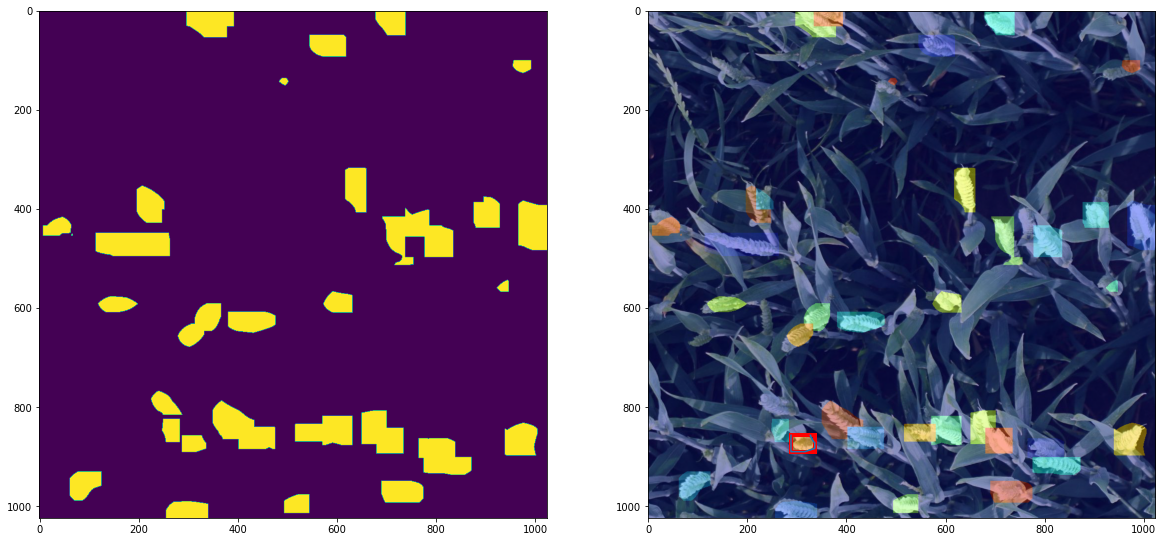

In [ ]:
""" Check instance inference """

# Get mask
counter = 0;
for img_name in tqdm(img_names, total=len(img_names)):
  if(counter == 1800):
    print(img_name)
    break;
  else:
  
    counter = counter + 1;

print(counter)
# img_name = '006a994f7'
img, mask = get_mask(img_name, 1) 

# Got crossed and dont crossed boxes
bb_full = bb_list[counter].copy();
bb_cross, bb_idx = iou_define(bb_full)

bb_not_cross = [];
for i in range(len(bb_full)):
  if(i not in bb_idx):
    bb_not_cross.append(i);

# Find inctance map
new_mask_heat, new_mask = divide_box(mask, bb_full, bb_cross, bb_not_cross, img_name, midas, transform_md)

# Find polygons and boxes for annotation
test_poly, test_bb, _, _, one_hot = get_poly_and_box(new_mask);

# Get transparent image
img_transparent = cv2.addWeighted(new_mask_heat, 0.4, img, 0.6, 0.0)

# Plot image and mask
cn = 2; # Num of the bbox and polygon to plot
plt.figure(2, figsize=(20,20))
plt.subplot(121)
new_mask[new_mask>0]=255
plt.imshow(new_mask)

plt.subplot(122)
plt.imshow(img_transparent)

# Create polygon
x = test_poly[cn][0][0::2];
y = test_poly[cn][0][1::2];
plt.plot(x, y)

# Create a Rectangle patch
B = test_bb[cn].copy();
plt.gca().add_patch(Rectangle((B[0],B[1]),B[2],B[3], edgecolor='red', facecolor='none', lw=4))


  0%|          | 0/3374 [00:00<?, ?it/s]

[[[437.0, 1006.0, 437.0, 1023.0, 466.0, 1023.0, 466.0, 1008.0, 464.0, 1006.0]], [[799.0, 945.0, 799.0, 946.0, 802.0, 949.0, 802.0, 945.0]], [[384.0, 350.0, 384.0, 353.0, 383.0, 354.0, 383.0, 365.0, 382.0, 366.0, 382.0, 369.0, 376.0, 375.0, 375.0, 375.0, 374.0, 376.0, 373.0, 376.0, 372.0, 377.0, 370.0, 377.0, 369.0, 378.0, 364.0, 378.0, 363.0, 379.0, 356.0, 379.0, 355.0, 380.0, 348.0, 380.0, 347.0, 381.0, 340.0, 381.0, 339.0, 382.0, 334.0, 382.0, 333.0, 383.0, 331.0, 383.0, 330.0, 384.0, 327.0, 384.0, 326.0, 385.0, 324.0, 385.0, 323.0, 386.0, 321.0, 386.0, 320.0, 387.0, 318.0, 387.0, 317.0, 388.0, 315.0, 388.0, 314.0, 389.0, 312.0, 389.0, 311.0, 390.0, 309.0, 390.0, 308.0, 391.0, 307.0, 391.0, 306.0, 392.0, 304.0, 392.0, 303.0, 393.0, 302.0, 393.0, 301.0, 394.0, 299.0, 394.0, 298.0, 395.0, 297.0, 395.0, 296.0, 396.0, 294.0, 396.0, 293.0, 397.0, 292.0, 397.0, 290.0, 399.0, 289.0, 399.0, 288.0, 400.0, 289.0, 401.0, 289.0, 402.0, 291.0, 404.0, 291.0, 405.0, 293.0, 407.0, 293.0, 408.0, 294.

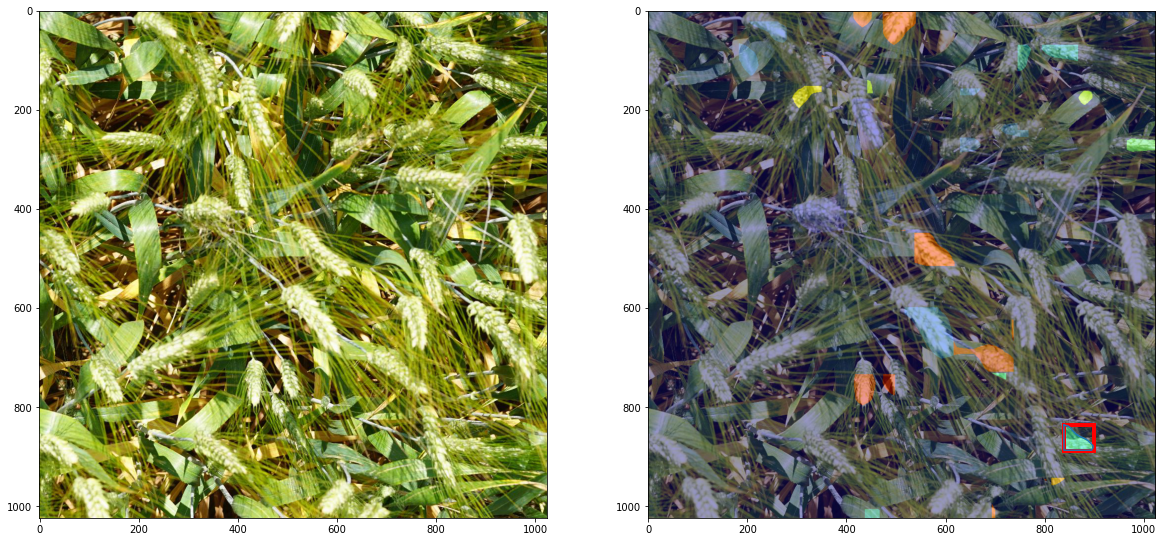

In [ ]:
# """ GET COCO ANNOTATIONS """

# counter = 0;
# bb_full = [];
# anno_list = [];
# for img_name in tqdm(img_names, total=len(img_names)):

#   # Get mask
#   img_name = img_name_1
#   img, mask = get_mask(img_name, 1) 

#   # Got crossed and dont crossed boxes
#   bb_full = bb_list[2].copy();
#   bb_cross, bb_idx = iou_define(bb_full)

#   bb_not_cross = [];
#   for i in range(len(bb_full)):
#     if(i not in bb_idx):
#       bb_not_cross.append(i);

#   # Find inctance map
#   new_mask_heat, new_mask = divide_box(mask, bb_full, bb_cross, bb_not_cross, img_name, midas, transform_md)

#   # Find polygons and boxes for annotation
#   test_poly, test_bb, _, _, one_hot = get_poly_and_box(new_mask);

#   # Collect annotations
#   for i in range(len(test_poly)):
#     anno_dict = {};
#     anno_dict['segmentation'] = test_poly[i].copy();
#     anno_dict['area'] = float(0.0);
#     anno_dict['iscrowd'] = int(0);
#     anno_dict['image_id'] = int(counter);
#     anno_dict['bbox'] = test_bb[i].copy();
#     anno_dict['category_id'] = int(1);
#     anno_dict['id'] = int(i);

#     anno_list.append(anno_dict);

#   counter = counter +1;
#   break;

# # Get transparent image
# img_transparent = cv2.addWeighted(new_mask_heat, 0.4, img, 0.6, 0.0)

# cn = 3;

# plt.figure(2, figsize=(20,20))
# plt.subplot(121)
# plt.imshow(img)
# # plt.imshow(new_mask_heat)

# plt.subplot(122)
# plt.imshow(img_transparent)


# x = test_poly[cn][0][0::2];
# y = test_poly[cn][0][1::2];
# print(test_poly)

# plt.plot(x, y)
# # Create a Rectangle patch
# B = test_bb[cn];
# plt.gca().add_patch(Rectangle((B[0],B[1]),B[2],B[3], edgecolor='red', facecolor='none', lw=4))


In [ ]:

# MY_COCO_ANNO = {};
# MY_COCO_ANNO['categories'] = [{'supercategory': 'wheat', 'id': int(1), 'name': 'wheat'}];
# MY_COCO_ANNO["annotations"] = anno_list.copy();

In [ ]:
# with open('data.json', 'w') as f:
#     json.dump(MY_COCO_ANNO, f)

In [ ]:
""" GET YOLO ANNOTATIONS """

counter = 0;
bb_full = [];
anno_list = [];
for img_name in tqdm(img_names, total=len(img_names)):

  # Get mask
  img, mask = get_mask(img_name, 1) 

  # Got crossed and dont crossed boxes
  bb_full = bb_list[counter].copy();
  bb_cross, bb_idx = iou_define(bb_full)

  bb_not_cross = [];
  for i in range(len(bb_full)):
    if(i not in bb_idx):
      bb_not_cross.append(i);

  # Find inctance map
  new_mask_heat, new_mask = divide_box(mask, bb_full, bb_cross, bb_not_cross, img_name, midas, transform_md)

  # Find polygons and boxes for annotation
  test_poly, test_bb, _, _, one_hot = get_poly_and_box(new_mask);

  # Collect annotations
  W = img.shape[0];
  H = img.shape[1];
  lines = [];
  for i in range(len(test_poly)):
    poly_list = test_poly[i][0].copy();

    if(poly_list == []):
      line = line + '\n';
    else:
      poly_x = [ii/float(W) for ii in poly_list[0::2]];
      poly_y = [jj/float(H) for jj in poly_list[1::2]];
      poly_list[0::2] = poly_x.copy()
      poly_list[1::2] = poly_y.copy()

      line = '0';
      for sym in poly_list:
        line = line + ' ' + str(sym);
      line = line + '\n';
    
    lines.append(line);
    poly_list = [];
    line = '';

  # write labels
  # print(poly_x, poly_y)
  with open('../wheat/labels/train/' + img_name + '.txt', 'w') as f:
  # with open('HUETA' + img_name + '.txt', 'w') as f:
    for stroka in lines:
      f.write(stroka);
    # lines = [];
  # print('\n', i, line, '\n', lines, '\n')
    
  counter = counter + 1;
  # if(counter == 3):
  #   break;

  


  0%|          | 0/3374 [00:00<?, ?it/s]/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)
 45%|████▍     | 1505/3374 [37:02<53:54,  1.73s/it]

data.json           requirements.txt     TransCAM_mytest.pth
deeplab/            tblog/               TransCAM_mytest_v2.log
evaluation.py       test_deeplab.py      TransCAM_mytest_v2.pth
example.png         test_kaggle/         TransCAM_mytest_WHEAT_crop.log
HUETA00333207f.txt  tool/                TransCAM_mytest_WHEAT.log
HUETA005b0d8bb.txt  train_aff.py         TransCAM_mytest_WHEAT.pth
HUETA006a994f7.txt  train_deeplab.py     TransCAM_mytest_WHEAT_v13.log
infer_aff.py        train_kaggle/        TransCAM_mytest_WHEAT_v13.pth
infer_TransCAM.py   train_TransCAM.py    visualize.ipynb
network/            TransCAM.log         voc12/
README.md           TransCAM_mytest.log


True

[ 0  1  3  5  7  9 10 13 15 16 17 18 20 21 23 24 25 27 32 34 35 38 39 40
 41 44 45 47 48 49 51 52 54 55 58 59 60 62 69 70 71 72 73 76 77 80]


[  0 255]
[  0 255]
[  0 255]
[  0 255]
[  0 255]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 19 22 23 24 25 26 30
 31 32]



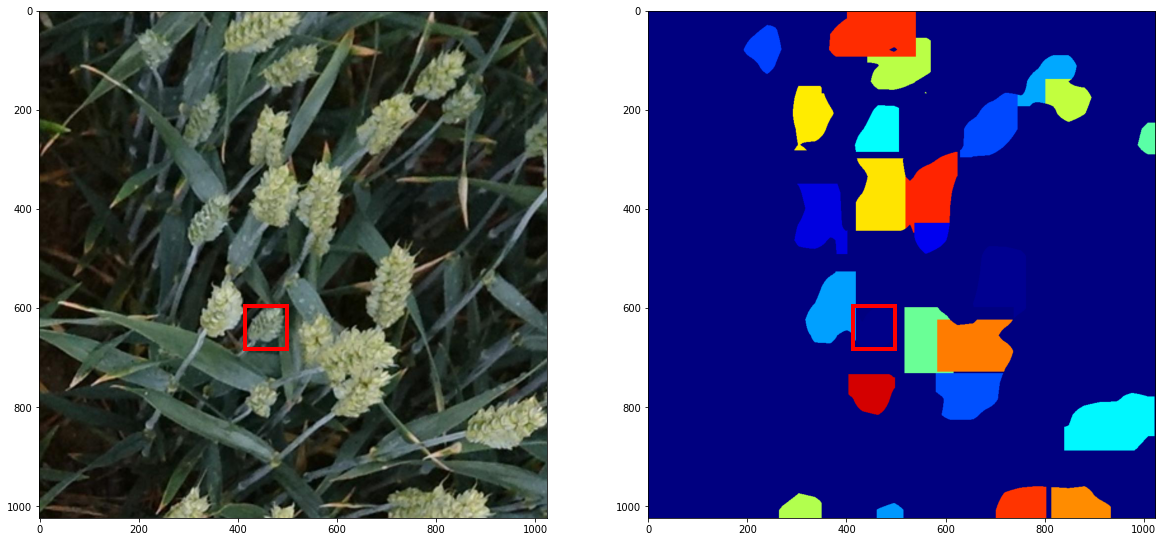

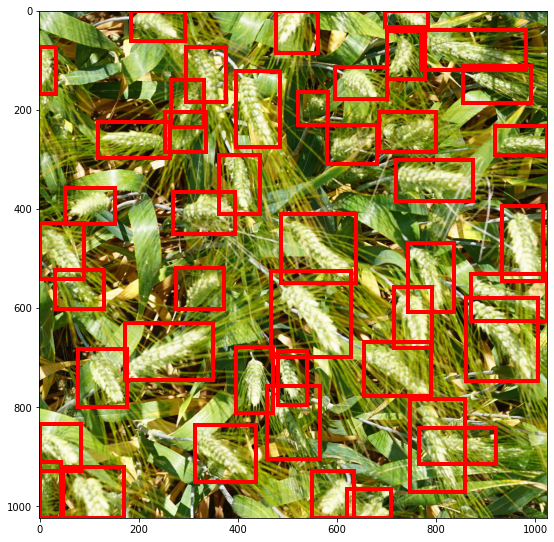

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])
36781
{'description': 'COCO 2017 Dataset', 'url': 'http://cocodataset.org', 'version': '1.0', 'year': 2017, 'contributor': 'COCO Consortium', 'date_created': '2017/09/01'}
[{'license': 4, 'file_name': '000000397133.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000397133.jpg', 'height': 427, 'width': 640, 'date_captured': '2013-11-14 17:02:52', 'flickr_url': 'http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg', 'id': 397133}, {'license': 1, 'file_name': '000000037777.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg', 'height': 230, 'width': 352, 'date_captured': '2013-11-14 20:55:31', 'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg', 'id': 37777}, {'license': 4, 'file_name': '000000252219.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000252219.jpg', 'height': 428, 'width': 640, 'date_captured': '2013-11-14 22:32:02', 'flick

0

' REAL CODE FOR REAL PURPOSE '